### Step 1: Library Importation

In [1]:
# import libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import griddata
import math

### Step 2: mixGauss

In [2]:
# Random Data Generation
def mixGauss(means, sigmas, n):
    # means 
    #	means [[3, 0], 
                # [0, 0]]
    # means = [[3, 0],  
    # Class 1 mean: [mean_feature1_class1, mean_feature2_class1]
    # Each row refers to each class, and each column refers to each feature of the corresponded class
    # For instance [3, 0] is the row of the class 1, 3 is the mean of the first feature, and 0 is the mean of the second feature
     # [0, 0]]  # Class 2 mean: [mean_feature1_class2, mean_feature2_class2]
    
    # sigmas = standard deviations for each class
    # n = number of samples to be generated 
		
    """
    Generate synthetic data for a mixture of Gaussians.

    Parameters:
    - means : 2D array (num_classes, d)
        Each row of the array gives the mean of the Gaussian in multiple dimensions (features or columns) for one class.
        For binary classification problems, the number of rows should be 2!
    - sigmas : 1D array (num_classes)
        The standard deviation for the Gaussian distribution of each class (isotropic Gaussian!) -> in the explanation there is an awesome description for this (is a list or array of standard deviations, with each element corresponding to one class in the mixture - how "wide" or "narrow" the Gaussian distribution is). 
    - n : int
        The number of samples to be generated for each class.

    Returns:
    - data : 2D array (n * num_classes, d)
        Synthetic data points generated for all classes.
    - labels : 1D array (n * num_classes)
        Labels associated with the generated data points.

    Example:
    
    >>> means = [[3, 0], [0, 0]]
    >>> sigmas = [0.5, 1]
    >>> X, Y = mixGauss(means, sigmas, n=100)
    >>> fig, ax = plt.subplots()
    >>> ax.scatter(X[Y == 1,0], X[Y == 1,1], marker='o', color='r')
    >>> ax.scatter(X[Y == -1,0], X[Y == -1,1], marker='o', color='b')
    """

    # Convert input parameters to NumPy arrays
    means = np.array(means)
    sigmas = np.array(sigmas)

    # Get the dimensionality (number of features) and number of classes
        # Columns = number of features
    # shape[0] = rows number
    # shape[1] = columns number
    # One of the lines is extra, one is sufficient
    d = means.shape[1]
    num_classes = sigmas.size

    # Initialize arrays to store synthetic data and labels
    # numpy.full(shape, fill_value, dtype=None, order='C', *, like=None)[source]
    # Return a new array of given shape and type, filled with fill_value.
    # np.full((2, 2), np.inf)
    #	array([[inf, inf],
    #	       [inf, inf]])
    #	np.full((2, 2), 10)
    #	array([[10, 10],
    #	       [10, 10]])
    # For 10 rows and 2 classes, it would include 20 rows and 2 columns(mentioned before)
    # np.inf is the contant (means infinite)
    data = np.full((n * num_classes, d), np.inf)
    # labels or y is should contain only one column that now is fulfilled by zero
    labels = np.zeros(n * num_classes)

    # Generate synthetic data for each class
        # >>> enm = enumerate([3, 5, 7, 9])
        # >>> print(list(enm))
        # [(0, 3), (1, 5), (2, 7), (3, 9)]	=> idx is the index and sigma is the value
    for idx, sigma in enumerate(sigmas):
        # Generate n samples for each class using multivariate normal distribution
        ''' random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
Draw random samples from a multivariate normal distribution.
The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.
'''

        ''' 
        --- np.random.multivariate_normal: This NumPy function generates random samples from a multivariate (چند متغییره) normal distribution.
        --- mean=means[idx]: The mean vector for the current class is specified by the 'means' array at index `idx`.
        --- cov=np.eye(d) * sigmas[idx] ** 2: The covariance matrix is a diagonal matrix with diagonal elements equal to the square of the current class's standard deviation (`sigma`). 
        --- np.eye(d)`:creates an identity matrix of size `d`.
        --- size=n: This parameter specifies the number of samples to generate for the current class.
        '''

        ''' numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)[source]
      Return a 2-D array with ones on the diagonal and zeros elsewhere.
      np.eye(2, dtype=int)
        array([[1, 0],
               [0, 1]])
        np.eye(3, k=1)
        array([[0.,  1.,  0.],
               [0.,  0.,  1.],
               [0.,  0.,  0.]]) '''
        
        # random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
        # Draw random samples from a multivariate normal distribution.
        ''' Let's clarify this code with real example:
                sigma_size = 2 (columns or classes)
                idx = 0
                data[0:100] = ...
                label[0:100] = ...

                idx = 1
                data[100:200] = ...
                label[100:200] = ...
                    as it is obvious from this generation is accomplished for each class first 0 to 100 elements of the array, the second is 100 to 200. 
                Actually, instead of using nested for, we use range to assign the random values
        '''
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(
            mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2, size=n)
        labels[idx * n:(idx + 1) * n] = idx 

    # For binary classification, convert labels from 0 to -1
    # All y_array elements would be -1
    if num_classes == 2:
        labels[labels == 0] = -1

    # Return generated data and labels
    return data, labels

In [3]:
  %matplotlib inline

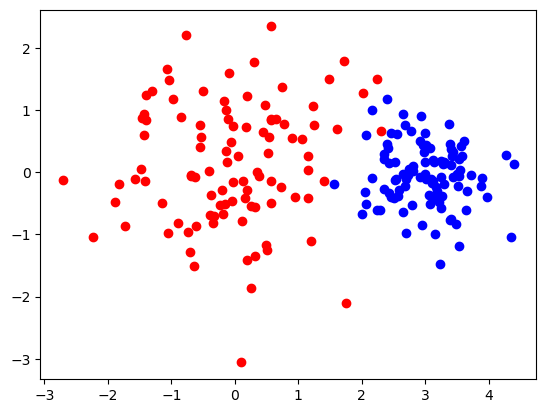

In [4]:
means = [[3, 0], [0, 0]]
sigmas = [0.5, 1]
X, Y = mixGauss(means, sigmas, n=100)
fig, ax = plt.subplots()
ax.scatter(X[Y == 1,0], X[Y == 1,1], marker='o', color='r')
ax.scatter(X[Y == -1,0], X[Y == -1,1], marker='o', color='b')

In [199]:
# conda install -c conda-forge ipympl

In [200]:
print('X: {0}'.format(X))

X: [[ 2.93898003 -0.50506024]
 [ 3.16007475  0.05988039]
 [ 1.9921026   0.19695486]
 [ 3.18707743  0.10198302]
 [ 2.85930252  0.59000526]
 [ 2.26942873 -0.81291244]
 [ 2.36492769 -0.39199866]
 [ 3.85549479  1.09893328]
 [ 4.13755802  0.03688323]
 [ 2.28617652  0.4155486 ]
 [ 3.96672959 -1.20633845]
 [ 2.96807657 -0.62353202]
 [ 3.11354941  1.31926139]
 [ 3.41278313  0.27606996]
 [ 2.92463408 -0.54732267]
 [ 3.01466899 -0.46102623]
 [ 3.3635165  -0.1048351 ]
 [ 3.34160303  0.02918925]
 [ 3.31221196  1.06982446]
 [ 2.28639699  1.00789548]
 [ 2.64868268  0.22430513]
 [ 3.5222839   0.86711874]
 [ 2.28795428  1.14503724]
 [ 3.81472387  0.76173733]
 [ 2.7742162   0.38840111]
 [ 3.58261244  0.61927476]
 [ 2.48991891  0.45834463]
 [ 3.06068991 -0.12215657]
 [ 3.13481883  0.12104221]
 [ 2.89719146 -0.11911499]
 [ 2.97510954 -0.28743837]
 [ 3.11361766  0.10708596]
 [ 3.2018588   0.49159549]
 [ 3.44404024  0.01643753]
 [ 2.82589103 -0.42999455]
 [ 2.80302388  0.39019192]
 [ 2.3814234  -0.36125823

In [201]:
print('Y: {0}'.format(Y))

Y: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


### Step 3: Noise Calculation

In [5]:
def flipLabels(Y, perc):
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
		# Randomly choose indices to flip without replacement
		# Random index generation from zero to n and n_flips number
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
		# Noise Simulation by Reverse Process
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

### Step 4: separatingFLR

In [6]:
def separatingFLR(Xtr, Ytr, Ypred, w):
    fig, ax = plt.subplots()
		
    # create an array of 200 evenly spaced values between the minimum and
        # maximum values of Xtr[:, 0].min() and Xtr[:, 0].max()
    xi = np.linspace(Xtr[:, 0].min(), Xtr[:, 0].max(), 200)
    yi = np.linspace(Xtr[:, 1].min(), Xtr[:, 1].max(), 200)
    X, Y = np.meshgrid(xi,yi)
    # Return a list of coordinate matrices from coordinate vectors.
    # Make N-D coordinate arrays for vectorized evaluations of N-D
    # scalar/vector fields over N-D grids, given one-dimensional
    # coordinate arrays x1, x2,…, xn.

    # >>> np.linspace(2.0,3.0, num=5)
    # array([2.  , 2.25, 2.5 , 2.75, 3.  ])

    # >>> np.linspace(2.0,3.0, num=5, endpoint=False)
    # array([2. ,  2.2,  2.4,  2.6,  2.8])

    # >>> np.linspace(2.0,3.0, num=5, retstep=True)(
    # array([2.  ,  2.25,  2.5 ,  2.75,  3.  ]), 0.25)
    
    zi = griddata(Xtr, Ypred, (X,Y), method='linear')
    
    ax.contour(xi, yi, zi, 15, linewidths=2, colors='k', levels=[0])
    # plot data points.
    ax.scatter(Xtr[:,0], Xtr[:,1], c=Ytr, marker='o', s=100, zorder=10, alpha=0.8)
    ax.xlim(Xtr[:,0].min(), Xtr[:,0].max())
    ax.ylim(Xtr[:,1].min(), Xtr[:,1].max())

### Step 5: Linear logistic regression with gradient descent

Code Part 1: optimal_gd_learning_rate → Optimal Learning Rate Calculation

In [7]:
def optimal_gd_learning_rate(Xtr, reg_par):
    # Estimate the gamma parameter: the optimal learning rate for gradient
			# descent
		#  This line computes the eigenvalues of the symmetric matrix Xtr.T @ Xtr. 
			# A symmetric matrix is a matrix that is equal to its transpose
				# A^T = A
		# The @ operator denotes matrix multiplication.
		# The eigenvalues are stored in the array eigvals
		# ??? Xtr.T @ Xtr -> for this for now just accept it
		# More explanation is in the Code Analysis section 
    eigvals = np.linalg.eigvalsh(Xtr.T @ Xtr)
    L = np.max(eigvals) / Xtr.shape[0] + 2 * reg_par
    gamma = 1 / L
    return gamma

Code 2: train_logreg_gd → Logistic Regression Model using Gradient Descent

In [8]:

def train_logreg_gd(Xtr, Ytr, reg_par, maxiter=100):
    """
    Train a logistic regression model using gradient descent.
    Parameters:
    - Xtr: array of shape (n, d), training inputs
    - Ytr: array of shape (n,) or (n, 1), training outputs
    - reg_par: regularization parameter (a scalar)
    - maxiter: the maximum number of gradient-descent iterations
    
    Returns:
    - w: array of shape (d, 1), learned weights
    - training_losses: array of shape (maxiter + 1,), training losses over iterations
    """
    # Epsilon is a criterion for early stopping
    epsilon = 1e-6
    
    # size of the input in the training
    # n = number of rows, D = number of columns
    n, D = np.shape(Xtr)
    
    # initialization of the vector w
    ''' np.zeros((n, 1)) - This represents a 2-dimensional array with one column and `n` rows. It is essentially a column vector.
    - Example:
        
        ```
        [[1],
         [2],
         [3],
         ...,
         [n]]
        
        ```
        
    - This is a "rank-2" array. 
    
    
    np.zeros((n,)) -> 1D array like [1,2,3,4,5,6,...,n]
    '''
    # 2D array
    w = np.zeros((D, 1))
    
    # Set the learning rate optimally
    # The previous function
    gamma = optimal_gd_learning_rate(Xtr, reg_par)
    
    # initialization of some supporting variables
    j = 0
    loss_old = 0
    # It acts as an unbounded upper value for comparison. This is useful for finding lowest values for something. for example, calculating path route costs when traversing trees. 
    loss = float("inf")
    # maxiter: the maximum number of gradient-descent iterations
    training_losses = np.zeros(maxiter + 1) # 1D array
    ''' numpy.reshape(a, newshape, order='C')
    			Gives a new shape to an array without changing its data.'''
    Ytr = Ytr.reshape(-1, 1)  # Convert from shape (n,) to shape (n, 1)
    														# From 1D to 2D array, to be more compatible
    ''' a = np.arange(6).reshape((3, 2))
    a
    array([[0, 1],
           [2, 3],
           [4, 5]])'''
    '''
    - reshape(-1, 1):**** The `reshape` method is used to change the shape of the array. The argument `-1` in one dimension means "infer the size of that dimension based on the size of the array and the other specified dimension." The `1` in the second dimension specifies that the array should have one column.
    '''
    
    while j < maxiter and abs(loss - loss_old) >= epsilon:
        loss_old = loss
        j = j + 1
    
        # Update weights using gradient descent step
    		# If you remember Coursera machine learning course, each time w is reduced until reach to the global minimum. Gamma is the learning rate (step size)
    		# reg_par: Regularization parameter - a hyperparameter that controls the regularization strength. It helps prevent overfitting by penalizing large weights (just like lambda). 
        w = w - gamma * gradient_logreg(Xtr, Ytr, w, reg_par)
    
        # Calculate the logistic loss
        loss = logistic_loss(Xtr, Ytr, w, reg_par)
    
        # Save the training loss for this iteration
        # In the professor code loss was like loss[0] whereas it is just one dimensional array, by eliminating [0], it worked
        training_losses[j] = loss
    
    return w, training_losses[:j]


Code Part 3: gradient_logreg

In [9]:
def gradient_logreg(X, Y, w, reg_par):
    """
    X : array of shape (n, d)
        Input features
    Y : array of shape (n,)
        Output labels (binary: 0 or 1)
    w : array of shape (d,)
        Weights
    reg_par : float
        Regularization parameter

    Returns:
    grad : array of shape (d,)
        Gradient of the logistic loss
    """
    # Rows and columns number
    n, d = X.shape

    # Calculate the predicted probabilities
    z = np.dot(X, w)
    # Predicted probabilities is calculated by sigmoid function,
        # just like y_pred in linear regression
    sigmoid = 1 / (1 + np.exp(-z))

    # Compute the gradient of the logistic loss
		# Gradient of logistic regression is utilized (used) in iterations
			# in order to minimize the error to reach to the minimum of the loss (cost)
			# just memorize the formula
    grad = np.dot(X.T, sigmoid - Y) / n + 2 * reg_par * w

    return grad

Code Part 4: Logistic Loss

In [10]:
def logistic_loss(X, Y, w, reg_par):
    """
    X : array of shape n, d
        Feature matrix
    Y : array of shape n
        True labels
    w : array of shape d, 1
        Weights
    reg_par : scalar
        Regularization parameter = lambda
    """
		# n = number of rows
		# _ = number of columns
    n, _ = X.shape

    # Calculate the dot product of feature matrix and weights
    y_pred = np.dot(X, w)

    # Apply the sigmoid function to obtain predicted probabilities
			# In order to obatin probability and in the binary model (a limited range of numbers, for intance two categories y_prob would be zero or one, it shouldn't be in the scalar mode)
    sigmoid = 1 / (1 + np.exp(-y_pred))

    # Calculate the logistic loss without regularization
    loss = -np.mean(Y * np.log(sigmoid) + (1 - Y) * np.log(1 - sigmoid))

    # Add regularization term (L2 regularization)
    reg_term = reg_par * np.sum(w**2) / (2 * n)
		# reg_par = lambda

    # Total loss is the sum of the logistic loss and the regularization term
    total_loss = loss + reg_term
    
    print("Total Loss: {0}".format(total_loss))
    
    return total_loss

Code Part 5: predict_logreg

In [11]:
def predict_logreg(weights, X):
    """
    Predict the output for logistic regression.

    Parameters:
    - weights: Array of shape (D, 1), where D is the number of features.
    - X: Array of shape (n, D), where n is the number of samples and D is the number of features.

    Returns:
    - ypred: 1D array of shape (n,), representing the raw scores.
    - ppred: 1D array of shape (n,), representing the predicted probabilities.
    """
    # Calculate the raw scores (ypred) using dot product of X and weights
    ypred = np.dot(X, weights)

    # Calculate the predicted probabilities (ppred) using the logistic function
    ppred = 1 / (1 + np.exp(-ypred))

    # Reshape the arrays to be 1D
    '''
		>>>	z = np.array([[1, 2, 3, 4],
			         [5, 6, 7, 8],
			         [9, 10, 11, 12]])
				z.shape
				(3, 4)

		>>> z.reshape(-1)
				array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
    '''
    return ypred.reshape(-1), ppred.reshape(-1)

### Step 6: Evaluation

Error Calculation

In [12]:
def calcError(Ypred, Y):
    """
    Calculate the classification error.

    Parameters:
    - Ypred: 1D array, predicted class labels.
    - Y: 1D array, true class labels.

    Returns:
    - class_err: Classification error rate, a scalar between 0 and 1.
    """
    # In binary classification, compare the sign of predictions with true labels
    # If signs are not equal, it indicates a misclassification
    class_err = np.mean(np.sign(Ypred) != Y)
    
    return class_err

Y prediction

In [13]:
def predict_logreg(weights, X):
    # - `ypred`: Raw scores or logits.
    # - `ppred`: Predicted probabilities after applying the sigmoid
    # activation function.
    """
    weights : array of shape d, 1
    X : array of shape n, d
    """
    # np.dot = Dot Production
    # [1,3].[5.6] = 1*5 + 3*6
    # ypred represents only scalar -> عددی
    ypred = np.dot(X, weights)
    # Try and understand what it does, deriving the formula
    ''' np.exp
            numpy.exp(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj]) = <ufunc 'exp'>
Calculate the exponential of all elements in the input array.
    '''
    # ppred represents as probability (0 or 1)
    # np.exp(-ypred) = e^{-ypred}
    ppred = 1 / (1 + np.exp(-ypred))
    # The outputs are reshaped to be 1D vectors.
    return ypred.reshape(-1), ppred.reshape(-1)

### Step 7: Initial Analysis

1. Create two binary classification datasets and Visualize them:

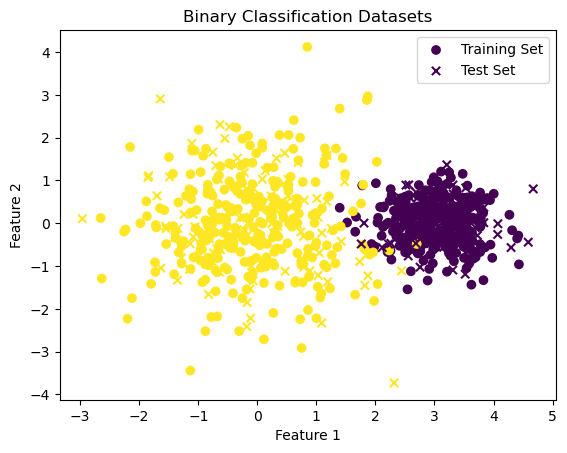

In [14]:
# Define means and sigmas
means = [[3, 0], [0, 0]]
sigmas = [0.5, 1]

# Generate datasets
Xtr, Ytr = mixGauss(means, sigmas, 300)
Xts, Yts = mixGauss(means, sigmas, 100)

# Add bias term
Xtr_wbias = np.c_[np.ones(Xtr.shape[0]), Xtr]
Xts_wbias = np.c_[np.ones(Xts.shape[0]), Xts]

# Visualize datasets
plt.scatter(Xtr[:, 0], Xtr[:, 1], c=Ytr, cmap='viridis', label='Training Set')
plt.scatter(Xts[:, 0], Xts[:, 1], c=Yts, cmap='viridis', marker='x', label='Test Set')
plt.title('Binary Classification Datasets')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [212]:
Xtr

array([[ 3.20158881,  0.14327753],
       [ 3.07721082,  0.67797063],
       [ 3.65313447,  0.48367865],
       ...,
       [-1.16496524, -0.03162163],
       [-1.27594056,  1.5229043 ],
       [-1.3109574 , -0.7146739 ]])

2. Train a logistic-regression model:

Total Loss: -0.14367199864703434
Total Loss: -0.6693043500761953
Total Loss: -1.074501904315983
Total Loss: -1.4229683336242385
Total Loss: -1.7382937965906384
Total Loss: -2.0309204606401354
Total Loss: -2.3061626985477695
Total Loss: -2.5670523255891182
Total Loss: -2.815498163975134
Total Loss: -3.052809214575005
Total Loss: -3.2799501208979014
Total Loss: -3.4976744253034107
Total Loss: -3.7065982537591227
Total Loss: -3.907243291138765
Total Loss: -4.100063114585133
Total Loss: -4.285460084050537
Total Loss: -4.4637966398392175
Total Loss: -4.635403151489797
Total Loss: -4.800583558997724
Total Loss: -4.959619551041785
Total Loss: -5.1127737425651345
Total Loss: -5.260292148113276
Total Loss: -5.402406146684504
Total Loss: -5.539334070968193
Total Loss: -5.671282513447257
Total Loss: -5.7984474151977805
Total Loss: -5.921014985215897
Total Loss: -6.039162485662406
Total Loss: -6.153058909643182
Total Loss: -6.262865571840574
Total Loss: -6.368736627706371
Total Loss: -6.4708195335

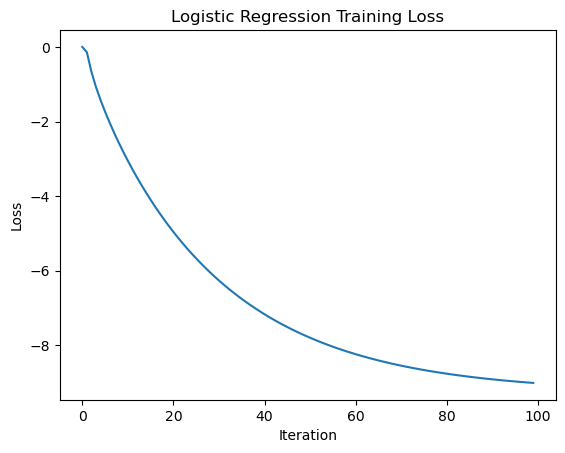

In [15]:
# Set regularization parameter # reg_par = lambda
reg_par = 0.1

# Train logistic regression model
	# def train_logreg_gd(Xtr, Ytr, reg_par, maxiter=100)
		# Return w, training_losses[:j]
estw, losses = train_logreg_gd(Xtr_wbias, Ytr, reg_par)
# The function train_logreg_gd() requires another function called
	# gradient_logreg() which should be defined (defined by ChatGPT)
''' Gradient of logistic regression is utilized (used) in iterations
			in order to minimize the error to reach to the minimum of the
			lost (cost) 
		just memorize the formula.
'''
# train_logreg_gd function return w, training_losses[:j]
print(losses)

# Plot the losses
plt.plot(losses)
plt.title('Logistic Regression Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

QhullError: QH6013 qhull input error: input is less than 4-dimensional since all points have the same x coordinate    1

While executing:  | qhull d Qbb Qc Qt Q12 Qz
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 633884830  delaunay  Qbbound-last  Qcoplanar-keep  Qtriangulate
  Q12-allow-wide  Qz-infinity-point  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 6.6  Error-roundoff 8.4e-15  _one-merge 7.5e-14
  Visible-distance 5e-14  U-max-coplanar 5e-14  Width-outside 1e-13
  _wide-facet 3e-13  _maxoutside 1e-13


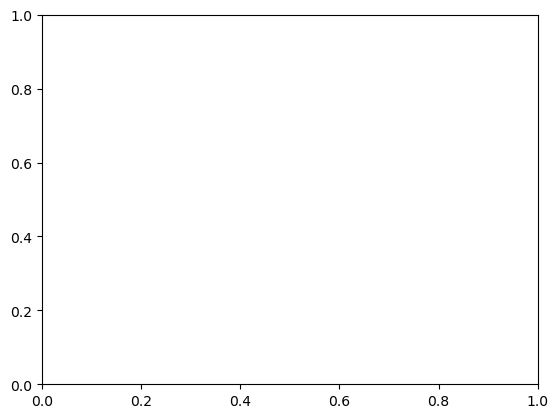

In [214]:
# Plot separating curve on the test set

# Y prediction calculation
# predict_logreg(weights, X)
ypred, ppred = predict_logreg(estw, Xts_wbias)

# def separatingFLR(Xtr, Ytr, Ypred, w): for visualization
separatingFLR(Xts_wbias, Yts, ppred, estw)
# This code should be fulfilled, ppred must be calculated

# This is based on Xts itself, x equals to the first column of Xts (Feature 1)
# y equals to the second column of Xts (Feature 2)
# Visualize datasets
'''
1. `plt.scatter`: This is a function from the `matplotlib.pyplot` module that is used to create a scatter plot.
2. `Xtr[:, 0]`: This extracts the values in the first column of the array `Xtr`. It represents the x-coordinates of the points in the scatter plot.
3. `Xtr[:, 1]`: This extracts the values in the second column of the array `Xtr`. It represents the y-coordinates of the points in the scatter plot.
4. `c=Ytr`: This parameter sets the color of each point based on the values in the array `Ytr`. Each unique value in `Ytr` will be assigned a different color. This is useful for visualizing the different classes or labels.
5. `cmap='viridis'`: This parameter specifies the colormap to be used for mapping the values in `Ytr` to colors. The 'viridis' colormap is a perceptually uniform colormap designed for better visibility and interpretation.
6. `label='Training Set'`: This parameter provides a label for the dataset being plotted. It's useful when you want to include a legend in the plot to identify different datasets or groups.
'''
# Actually this code is visualizing Xtr train set without predicted or true y
# For two columns, the first column of Xtr which is [:,0] as x axis and
# the second column is Xtr[:,1] as y axis
# Xtr[:, 0] all rows and the first column
# [:] all elements from zero to the final point
# This visualization is used for X_test or Xts
plt.scatter(Xts[:, 0], Xts[:, 1], c=Yts, cmap='viridis', marker='x', label='Test Set')
plt.title('Logistic Regression Separating Curve on Test Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

4. Evaluate the errors

In [16]:
# Predictions on training set
tr_pred, _ = predict_logreg(estw, Xtr_wbias)
tr_err = calcError(tr_pred, Ytr)

# Predictions on test set
ts_pred, _ = predict_logreg(estw, Xts_wbias)
ts_err = calcError(ts_pred, Yts)

# Print errors
print("Training error: %.2f%%, Test error: %.2f%%" % (tr_err * 100, ts_err * 100))

Training error: 26.00%, Test error: 27.00%


### Step 8: Interpreting the confidence of logistic regression predictions

In [17]:
def plot_logreg_confidence(X, Y, pred_confidence, threshold):
    """
    X : a (n, d) dataset
    Y : a (n, ) array of targets
    pred_confidence : A (n, ) array of probabilities predicted from X
    threshold : a float between 0 and 0.5 determining the probability threshold we use to 
                consider neutral predictions. For example if threshold=0.1 then all probabilities
                between 0.4 and 0.6 will be considered neutral (that is, neither belonging to class +1
                or to class -1).
    """
    fig, ax = plt.subplots()
    xi = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
    yi = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
    X_grid, Y_grid = np.meshgrid(xi,yi)
    
    zi = griddata(X, pred_confidence, (X_grid, Y_grid), method='linear')
    
    ax.contour(xi, yi, zi, 15, linewidths=2, levels=[0.5 - threshold, 0.5 + threshold])
    
    # Plot data points
    ax.scatter(X[:,0], X[:,1], c=Y, 
               marker='o', s=100, zorder=10, alpha=0.8)
    ax.set_xlim(X[:,0].min(), X[:,0].max())
    ax.set_ylim(X[:,1].min(), X[:,1].max())

In [18]:
# Generate some data
Xtr, Ytr = mixGauss([[0,1],[1,1]], [0.4,0.4], 100)
Xts, Yts = mixGauss([[0,1],[1,1]], [0.4,0.4], 100)

Xtr_wbias = np.hstack((Xtr, np.ones((Xtr.shape[0], 1))))
Xts_wbias = np.hstack((Xts, np.ones((Xts.shape[0], 1))))

Total Loss: 0.48099626196626766
Total Loss: 0.32865874793955985
Total Loss: 0.2098410858035565
Total Loss: 0.11061745078337652
Total Loss: 0.023649477971454048
Total Loss: -0.05509945532730476
Total Loss: -0.12797296134918354
Total Loss: -0.19640621678414308
Total Loss: -0.2613230496380918
Total Loss: -0.3233464005306755
Total Loss: -0.38291496221563365
Total Loss: -0.44035045131327544
Total Loss: -0.49589777135222135
Total Loss: -0.5497497182931546
Total Loss: -0.602062583643845
Total Loss: -0.6529662508819415
Total Loss: -0.7025708846119135
Total Loss: -0.7509714706771268
Total Loss: -0.7982509773932507
Total Loss: -0.844482617340485
Total Loss: -0.8897315122672503
Total Loss: -0.9340559542695985
Total Loss: -0.9775083879303735
Total Loss: -1.0201361948347176
Total Loss: -1.0619823343393753
Total Loss: -1.10308587682772
Total Loss: -1.1434824542952622
Total Loss: -1.183204645698085
Total Loss: -1.222282309617273
Total Loss: -1.2607428735333448
Total Loss: -1.2986115867872192
Total Lo

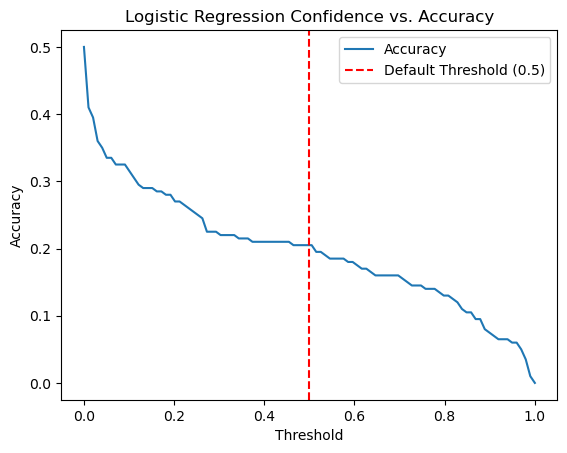

In [19]:
# Train logistic regression model
estw, losses = train_logreg_gd(Xtr_wbias, Ytr, reg_par=0.01)

# Obtain probability predictions for the test set
# predict_logreg function: 
	# predict_logreg(weights, X) 
	# return ypred.reshape(-1), ppred.reshape(-1) 
ts_pred, ts_conf = predict_logreg(estw, Xts_wbias)

# Plot the logistic regression confidence for different thresholds
# Create an array of 100 evenly spaced values between the minimum 0 and
		# to maximum 1
# This generation is in an ascending sort based
thresholds = np.linspace(0, 1, 100)
''' array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
				...
				])
''' 
accuracy = []

for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
		# DataFrame.astype(dtype, copy=None, errors='raise')[source]
			# Cast a pandas object to a specified dtype dtype.
		# The expression inside the parentheses evaluates to a boolean array where
			# each element is True if the corresponding probability in ts_conf is
			# greater than the specified threshold and False otherwise.
    binary_pred = (ts_conf > threshold).astype(int)
		# (ts_conf > threshold) returns boolean value true or false whereas the real
			# number is required therefore, true turns into 1 and false turns into 0
    
    # Calculate accuracy for each threshold
    acc = 1 - calcError(binary_pred, Yts)
    accuracy.append(acc)

# Plot the accuracy curve
# X = thresholds, Y = accuracy
plt.plot(thresholds, accuracy, label='Accuracy')
plt.axvline(x=0.5, linestyle='--', color='red', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Confidence vs. Accuracy')
plt.legend()
plt.show()

calc_error_with_confidence

In [20]:
def calc_error_with_confidence(prob_pred, Y, threshold):
    """
    Calculate the classification error on only the predictions with high confidence!
    """
    # 0.5
    # Identify instances predicted as class -1 with high confidence
    class_m1 = prob_pred <= 0.5 - threshold
    # Identify instances predicted as class 1 with high confidence
    class_p1 = prob_pred > 0.5 + threshold
    
    # Identify misclassifications in class -1
		# Based on class_m1 if Y[class_m1] equals to any other value except -1
			# means error (it should be -1 in this class), for this purpose save
			# all the errors for each element to obtain return statement
    err_class_m1 = Y[class_m1] != -1
    # Identify misclassifications in class 1
    err_class_p1 = Y[class_p1] != 1
    
    # Calculate the overall classification error on high-confidence predictions
    ''' It calculates the total number of misclassifications in class -1
             and class 1 and divides it by the total number of instances with
             high-confidence predictions. '''
    return (np.sum(err_class_m1) + np.sum(err_class_p1)) / (len(err_class_m1) + len(err_class_p1))

### Step 9 - Logistic Regression with Stochastic Gradient Descent

In [21]:
def train_logreg_sgd(Xtr, Ytr, reg_par, maxiter=100):
    """
    Xtr : array of shape n, d
    Ytr : array of shape n, or of shape n, 1
    reg_par : regularization parameter (a scalar)
    maxiter : the maximum number of gradient-descent iterations
    """
    epsilon = 1e-6
    # size of the input in the training
		# n rows, D columns
    n, D = np.shape(Xtr)
    # initialization of the vector w
		# Fill the w with D rows and 1 column with zeros
    w = np.zeros((D, 1))
    
    # initialization of some supporting variables
    training_losses = np.zeros(maxiter)
    # training_losses
    """ array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
    """

    """
    Convert from shape (n,) to shape (n, 1)
            # From 1D to 2D array, to be more compatible
    a = np.arange(6).reshape((3, 2))
    a
    array([[0, 1],
           [2, 3],
           [4, 5]])
    """    

    Ytr = Ytr.reshape(-1, 1)  # Convert from shape n, to shape n, 1
    """
    >>>	z = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])
    >>> z.shape
            (3, 4)

    >>> z.reshape(-1)
            array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
    """

    # maxiter : the maximum number of gradient-descent iterations	
    for j in range(maxiter):
        # The learning rate here is different from GD. You can take
        # a) 1 / sqrt(n)
        # b) 1 / sqrt(j) : the learning rate decreases at each iteration.
        # Which one do you expect leads to faster convergence?

        # Randomly select an index for the current sample
        # The randint() method returns an integer number selected element from the specified range.
            # Note: This method is an alias for randrange(start, stop+1).
        # This line generates random number from zero to n
        # np.random.randint(10)
            # generates a number from 0 to 10 (only one number)
        sample_idx = np.random.randint(n)

				# The learning rate here is different from GD. You can take
        # a) 1 / sqrt(n)
        # b) 1 / sqrt(j) : the learning rate decreases at each iteration.
        # Which one do you expect leads to faster convergence?
        gamma = 1 / np.sqrt(n)

        # Compute the logistic loss gradient for the current sample
        # reg_par = lambda

        '''
        Xtr[sample_idx:sample_idx+1, :] is selecting a single row from
        the array Xtr, specifically the row at index sample_idx, and
        including all columns of that row.
        '''
        # [sample_idx:sample_idx+1, :], first : is used to for row index
            # range and the second : is used for columns
        gradient = gradient_logreg(Xtr[sample_idx:sample_idx+1, :], Ytr[sample_idx], w, reg_par)
        
        # Update the weight vector using the learning rate(gamma)
            # and gradient
        w = w - (gamma * gradient)
        
        # Calculate the logistic loss on the current sample
        loss = logistic_loss(Xtr[sample_idx:sample_idx+1, :], Ytr[sample_idx], w, reg_par)
        
        # Save the loss for this iteration
        training_losses[j] = loss
        
        # Check for convergence: stop if the change in loss is small
        if j > 0 and abs(training_losses[j] - training_losses[j-1]) < epsilon:
            break
        
    # The for loop for each j, there is a limitation based on epsilon
    # Therefore maybe the whole maxiter number won't be used; j is
    # updated each time until the time that the break occurs;
    # As a conclusion, only the checked number based on epsilon required
    # to be depicted, [:j] means from 0 to j
    return w, training_losses[:j]

In [22]:
# TODO: Generate a dataset (use the code from the previous parts)
# means = ...
# sigmas = ...

# Consider these lines as instances
means = [[3, 0], [0, 0]]
sigmas = [0.5, 1]

# Generate training and test sets
Xtr, Ytr = mixGauss(means, sigmas, 300)
Xts, Yts = mixGauss(means, sigmas, 100)

In [236]:
# TODO: Train logistic regression with SGD
# Initialize parameters
reg_par = 0.1
maxiter_sgd = 1000

# Train logistic regression using stochastic gradient descent
w_sgd, losses_sgd = train_logreg_sgd(Xtr, Ytr, reg_par, maxiter=maxiter_sgd)

Total Loss: -0.22795043426604716
Total Loss: 0.5751525180186069
Total Loss: -0.9025510894373209
Total Loss: 0.8633103493090709
Total Loss: -1.2140132860502133
Total Loss: -1.2696258163210048
Total Loss: -2.668372949451944
Total Loss: 0.12941533945962286
Total Loss: 0.2847988839734663
Total Loss: -2.766299661913214
Total Loss: 0.43277503681845775
Total Loss: -3.4289179351689256
Total Loss: 0.40861825256060846
Total Loss: -2.994599480263185
Total Loss: 0.6441035948691954
Total Loss: -4.165145218321043
Total Loss: 0.4414021969513396
Total Loss: -3.039832058004022
Total Loss: 0.9710192550569107
Total Loss: 0.4508317732232714
Total Loss: 0.28368179570996727
Total Loss: -3.6364018002433567
Total Loss: -4.6014864985228625
Total Loss: 1.5467172237655542
Total Loss: -4.587990169159645
Total Loss: -5.6658605605746395
Total Loss: -5.091584913030237
Total Loss: -6.892788566480496
Total Loss: -6.197170516546407
Total Loss: -4.7771694217134115
Total Loss: -6.21941898440146
Total Loss: -5.72237072672